In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF version:", tf.__version__)

#check for gpu availability
print("GPU", "available (YESSSSSSSS)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.12.0
TF version: 2.12.0
GPU available (YESSSSSSSS)


In [ ]:
## getting our data ready(turnung into tensors)

import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

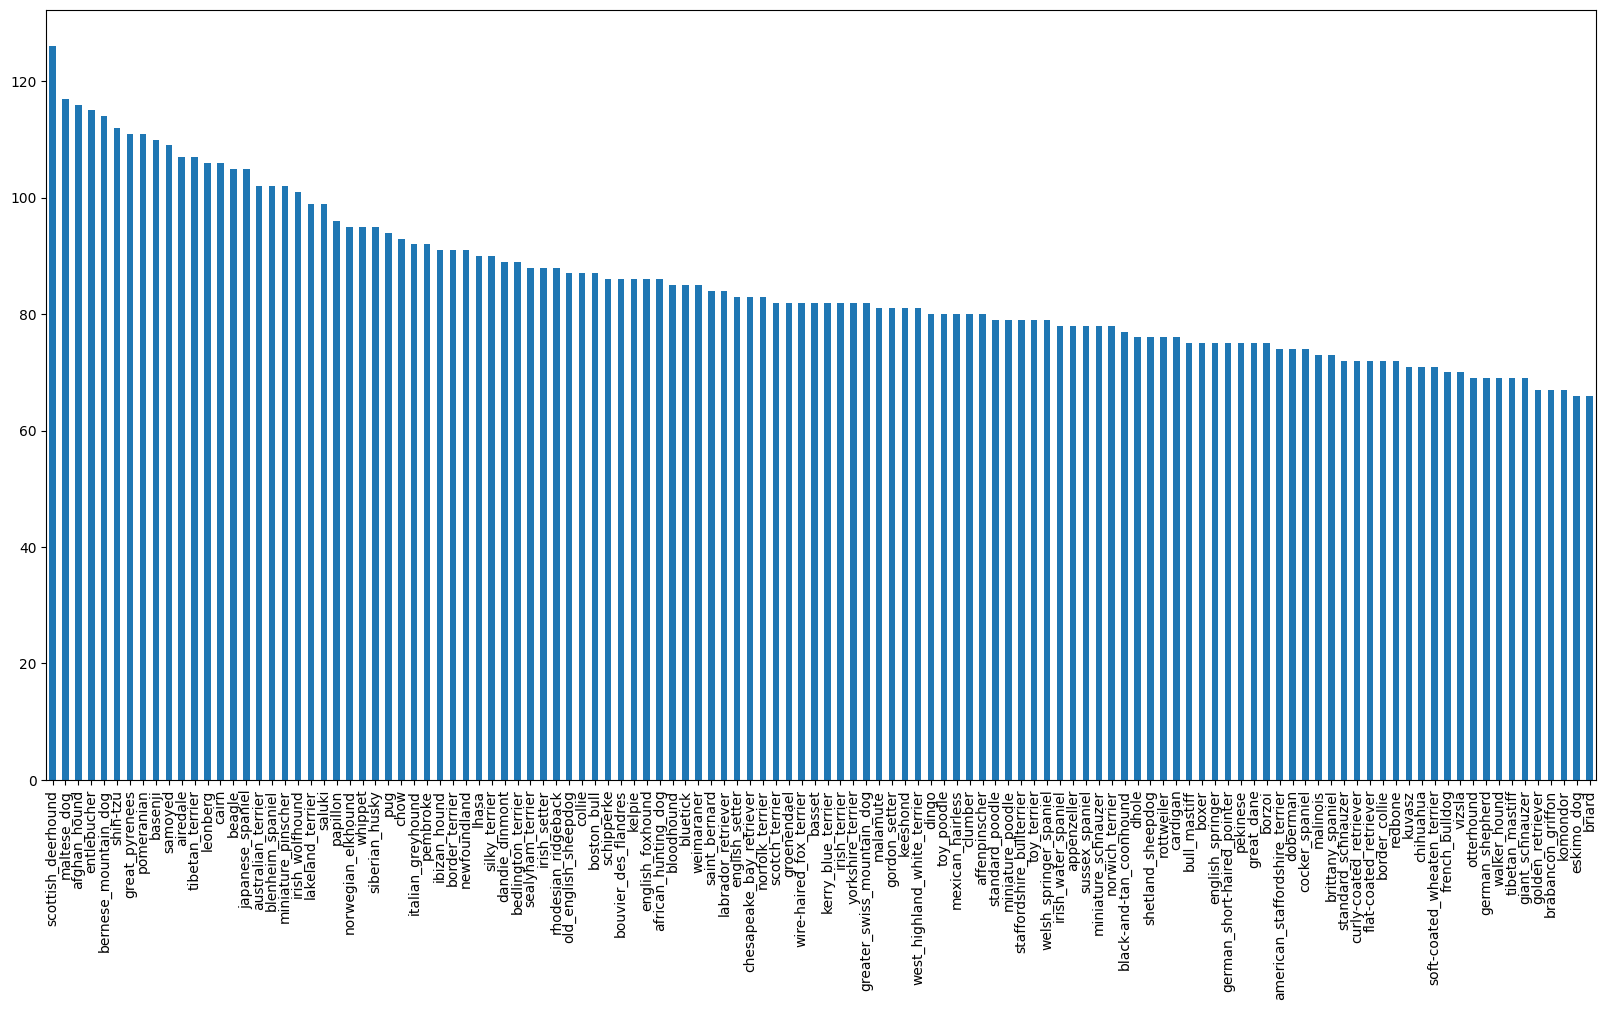

In [ ]:
#how many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

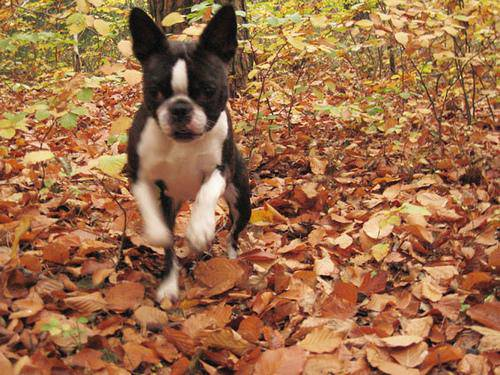

In [ ]:
#let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

##Getting images and their labels

lets get a lisst of our image file pathnames

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames = ["drive/MyDrive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir("drive/MyDrive/Dog Vision/train/")[:10]

['e387ac130247a8a48e1a136d9a4e013c.jpg',
 'e201fdbcd92e3d0a10d612d5e0b77b35.jpg',
 'e36b6d896092fa3f2b3298ce7adb2d97.jpg',
 'e4f17a9e5ee1ed5385744cd6e8916a4e.jpg',
 'e748f61d39da506904f531c7732df512.jpg',
 'df83ac04bc6a6891fe79d6e9b56c391b.jpg',
 'dd9aae7acb992593e07aa905ff4e5ca4.jpg',
 'e49b6c0fb5b8bb8b86fe2a1f48c65746.jpg',
 'e47cac448a3250262bee5660d393da9a.jpg',
 'dfed11d5d68bd13d8587bd3047ef8e5c.jpg']

In [ ]:

#check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


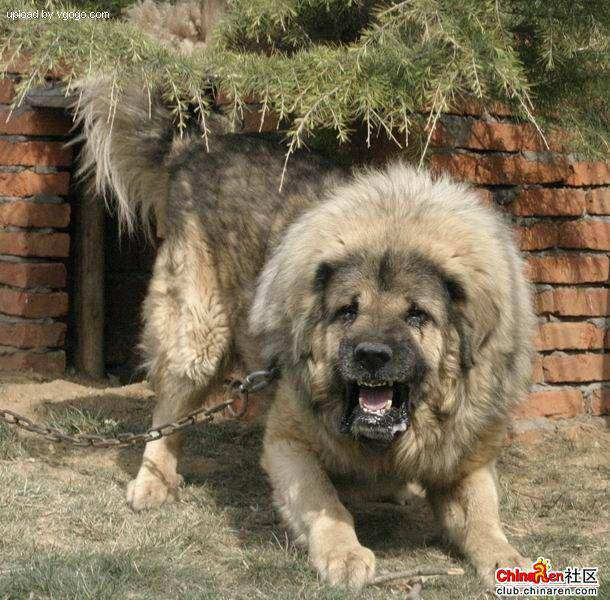

In [ ]:
#one more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
##prepare labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
## check if number of labels matches the number of filenames
if len(labels)==len(filenames):
  print("number of labels matches number of filenames")
else:
  print("number of labels does not match the number of filenames")

number of labels matches number of filenames


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
## turn a single label into aray of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
## turning boolean into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
### creating our own validation set
##setup x and y
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
#set number of images to use for experimenting
NUM_IMAGES = 1000


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
#lets look at training data
X_train[:5],y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## preprocessing images(turning images into tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable
3. Turn images(jpg) into Tensors
4.Normalize our image(convert color channel values from 0-255 to 0-1)
5. Resize the images to be shape of(224, 224)
6. Return the modified image



In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
## turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
#define image size
IMG_SIZE = 224

# create a function for preprocessing images
def process_image(image_path):

  #READ AN IMAGE FILE
  image = tf.io.read_file(image_path)

  #turn image to numerical tensor
  image = tf.image.decode_jpeg(image, channels=3)

  #convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #image resizing
  image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches
why turn data into batches
let's say you're trying to process 10,000+ images in one go it might not fit into memory.

so that's why we fit 32(batch size) images at a time(can be adjusted manually if needed)

inorder to use tensorflow effectively we need our data in the form of tensor tuples which look like this:(image, label)

In [ ]:
##Create a simple function to return the tuples
def get_image_label(image_path, label):

  image =process_image(image_path)
  return image, label

now we have got a way to turn our data into tuples of tensors in the form:(image, label), let's make a function to turn all our data(x & y)  into batches

In [ ]:
#define batch size
BATCH_SIZE = 32

#create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  ##if data is test dataset, we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

    #if the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X),#FILEPATH
                                              tf.constant(y)))#LABELS
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches..")
    #turn filepaths and labels into tensors
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    #shuffle pathnames and labels before mapping image processor function is faster than shuffle
    data = data.shuffle(buffer_size=len(X))

    ##create (image, label) tuples (this also turns the image path into preprocessed image)
    data = data.map(get_image_label)

    #turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
##create training and validation data batch
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Create training data batches..
Creating validation data batches...


In [ ]:
##check out different attributes
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
## visualizing data batch
import matplotlib.pyplot as plt

#create a function for viewing images in a data batch

def show_25_images(images, labels):
  #setup the figure
  plt.figure(figsize = (10, 10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #create subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    #Display an image
    plt.imshow(image[i])
    ##add the image labelas title
    plt.title(unique_breeds[labels[i].argmax()])

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
len(train_images), len(train_labels)

(32, 32)

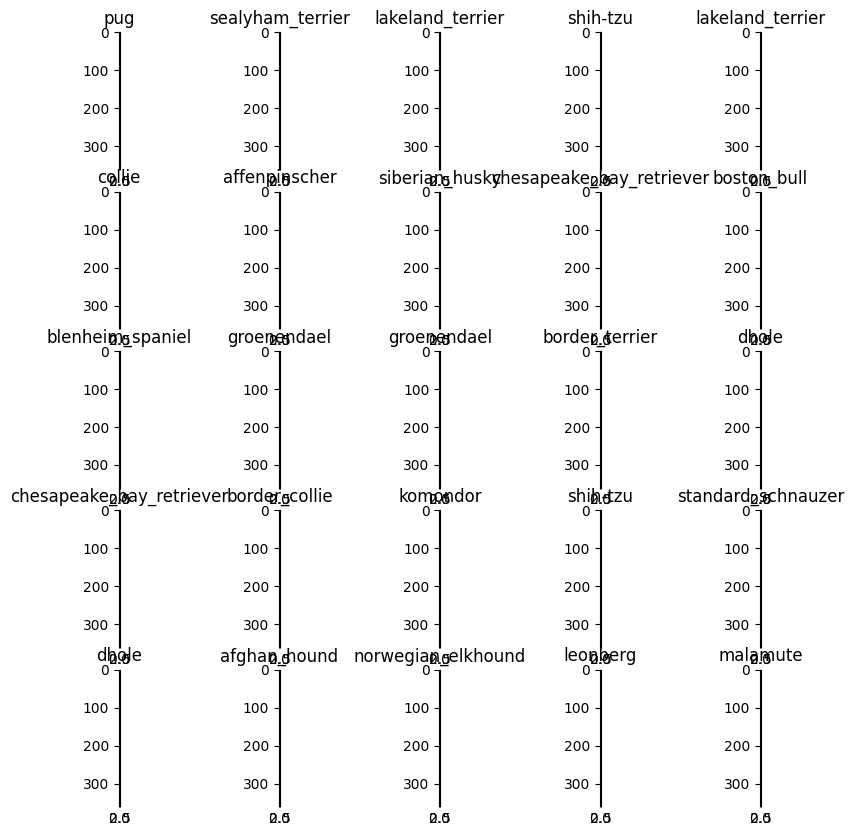

In [ ]:
#lets visualize
train_images, train_labels = next(train_data.as_numpy_iterator())

show_25_images(train_images,train_labels)

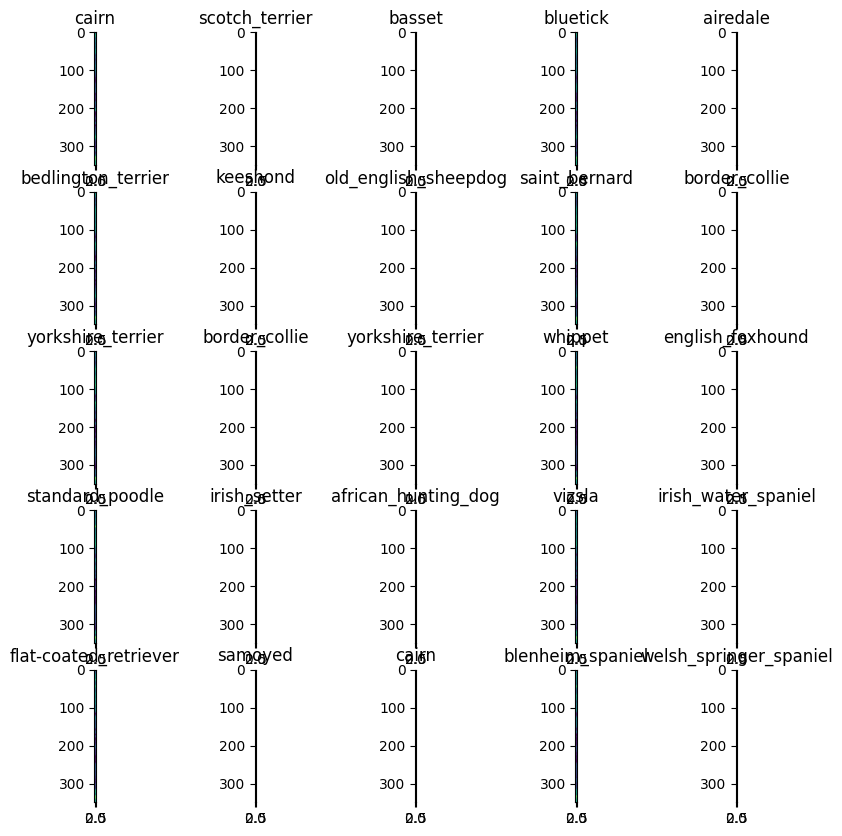

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
##building a model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

#setup model url from tensorflow hub

In [ ]:
IMG_SIZE

224

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  #batch, height, width, colour channels

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
## create a function which builds keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:",MODEL_URL)

  #setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #input layer
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")
  ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_4 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs = np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [ ]:
#creating callbacks
import datetime

#create a function to build a tensorboard

def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        #make it so the logs get track whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
##training a model(on subset of data)

#our first model is going to train on 1000 images to make sure every thing is working

In [ ]:
NUM_EPOCHS = 100 #@param {type : "slider", min:10, max:100,step:10}

In [ ]:
print("GPU", "available(YESSSSS)" if tf.config.list_physical_devices("GPU") else "not available:(")

GPU available(YESSSSS)


In [ ]:
#create a model using `create_model()`
#setup a tensorboard callback using create tensorboard_callback
#call fit() function
#return the model

In [ ]:
#build a function to train and return the train
def train_model():

  #create model
  model=create_model()

  #create tensor board session
  tensorboard = create_tensorboard_callback()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
#FIT THE MODEL TO THE DATA
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 15s 381ms/step - loss: 4.5839 - accuracy: 0.1075 - val_loss: 3.4472 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 3s 126ms/step - loss: 1.6090 - accuracy: 0.6875 - val_loss: 2.1364 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 4s 173ms/step - loss: 0.5483 - accuracy: 0.9488 - val_loss: 1.6819 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 4s 157ms/step - loss: 0.2426 - accuracy: 0.9900 - val_loss: 1.4730 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 3s 124ms/step - loss: 0.1423 - accuracy: 0.9987 - val_loss: 1.3906 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 3s 128ms/step - loss: 0.0980 - accuracy: 0.9987 - val_loss: 1.3556 - val_accuracy: 0.6700
Epoch 7/100
25/25 [=============================

In [ ]:
##checking the tensorboard logs
#tensorboard will access the logs directory and visualize

%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Dog\ Vision/logs

##making and evaluating predictions using trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:

#making predictions on the validation data()
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 91ms/step


array([[9.81380814e-04, 1.78888309e-04, 1.19071582e-03, ...,
        2.65759649e-04, 8.88647119e-05, 2.37031211e-03],
       [1.93752069e-03, 5.94366225e-04, 3.29041108e-02, ...,
        2.50914041e-03, 5.61383378e-04, 8.02864815e-05],
       [1.25322540e-05, 7.66217272e-06, 1.25363018e-04, ...,
        1.88818696e-04, 1.69922467e-04, 8.46994459e-04],
       ...,
       [7.52600954e-07, 2.43129864e-04, 1.09044064e-04, ...,
        2.73180904e-05, 4.00836929e-04, 4.08299384e-04],
       [1.00227790e-02, 1.85245328e-04, 2.96274811e-04, ...,
        3.61923128e-04, 1.49945656e-04, 3.88990678e-02],
       [3.88429104e-03, 1.65958671e-04, 2.65813840e-04, ...,
        3.15056182e-03, 4.81913012e-04, 1.57773757e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:


#first prediction
index=42
print(predictions[0])
print(f"Max value (probability of prediction ): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[9.81380814e-04 1.78888309e-04 1.19071582e-03 2.29055862e-04
 4.50390420e-04 4.99627167e-05 8.48981086e-03 6.46317191e-03
 2.65155977e-04 6.77333621e-04 4.70850558e-04 2.55094172e-04
 8.29015567e-04 8.67474955e-05 5.40695561e-04 3.84869898e-04
 4.80489034e-05 2.51690447e-01 3.18677885e-05 1.12589609e-04
 6.91503461e-04 1.46855731e-04 2.25912263e-05 3.46825714e-03
 3.61678067e-05 7.36783913e-05 1.90766066e-01 1.78213057e-04
 3.62000224e-04 3.49885930e-04 6.25334433e-05 1.34056364e-03
 8.97091522e-04 1.89177299e-04 2.04926837e-04 7.19211763e-03
 9.21664741e-06 7.61208648e-05 5.58163774e-05 5.64520888e-04
 4.47572349e-03 5.83337860e-05 3.74404408e-05 3.55549215e-04
 4.02248115e-05 9.16484278e-05 2.12822415e-05 6.62100560e-04
 3.76946904e-04 1.44177990e-04 2.19922367e-04 1.04471132e-04
 6.35616132e-04 1.13790547e-05 1.52806606e-04 7.16783252e-05
 2.56567946e-05 3.66070052e-03 1.99556816e-04 4.78789099e-02
 1.44005666e-04 1.31816691e-04 2.02682358e-03 2.65981616e-05
 5.32372331e-04 1.414818

In [ ]:
def get_pred_label(prediction_probabilities):

  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
##create a function to unbatch a batch dataset
def unbatchify(data):
  """ takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels"""
  images = []
  labels = []

  #Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#unbatchify the validation data

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:


images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
##now we have
#prediction labels
#validation labels
#validation images
#lets make some function to make these all a bit more visualize
#we will create a function which takes a array of prediction probablities

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  #get pred label
  pred_label = get_pred_label(pred_prob)

  #plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
#change the color of title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  #change plot title to be predicted, probability of prediction
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


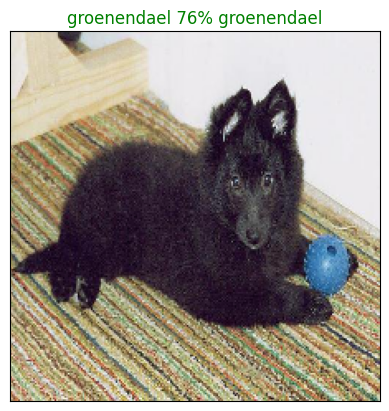

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities,labels, n=1):
  """ plus the top 10 highest prediction confidence along with the truth label for sample n"""

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  #Get the predicted label
  pred_label = get_pred_label(pred_prob)

  #find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find the top 10 prediction confidence
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  #setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  #change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

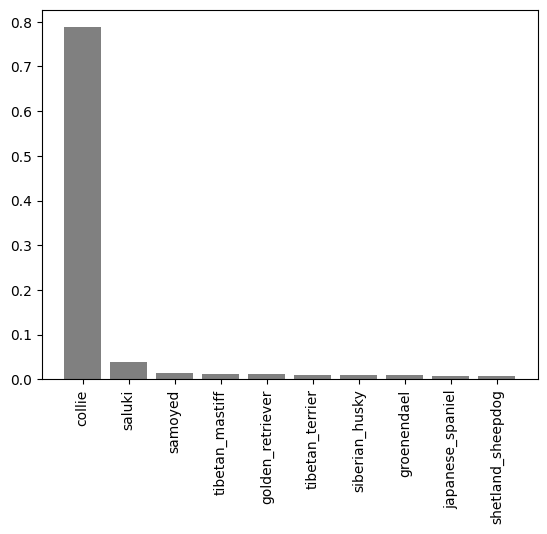

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.25169045, 0.19076607, 0.09098456, 0.07938615, 0.05603116,
       0.04787891, 0.03941164, 0.03298251, 0.02745253, 0.02575139],
      dtype=float32)

In [ ]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['border_terrier', 'cairn', 'lhasa', 'soft-coated_wheaten_terrier',
       'norfolk_terrier', 'irish_wolfhound', 'tibetan_terrier',
       'silky_terrier', 'miniature_schnauzer', 'otterhound'], dtype=object)

In [ ]:
predictions[0].max

<function ndarray.max>

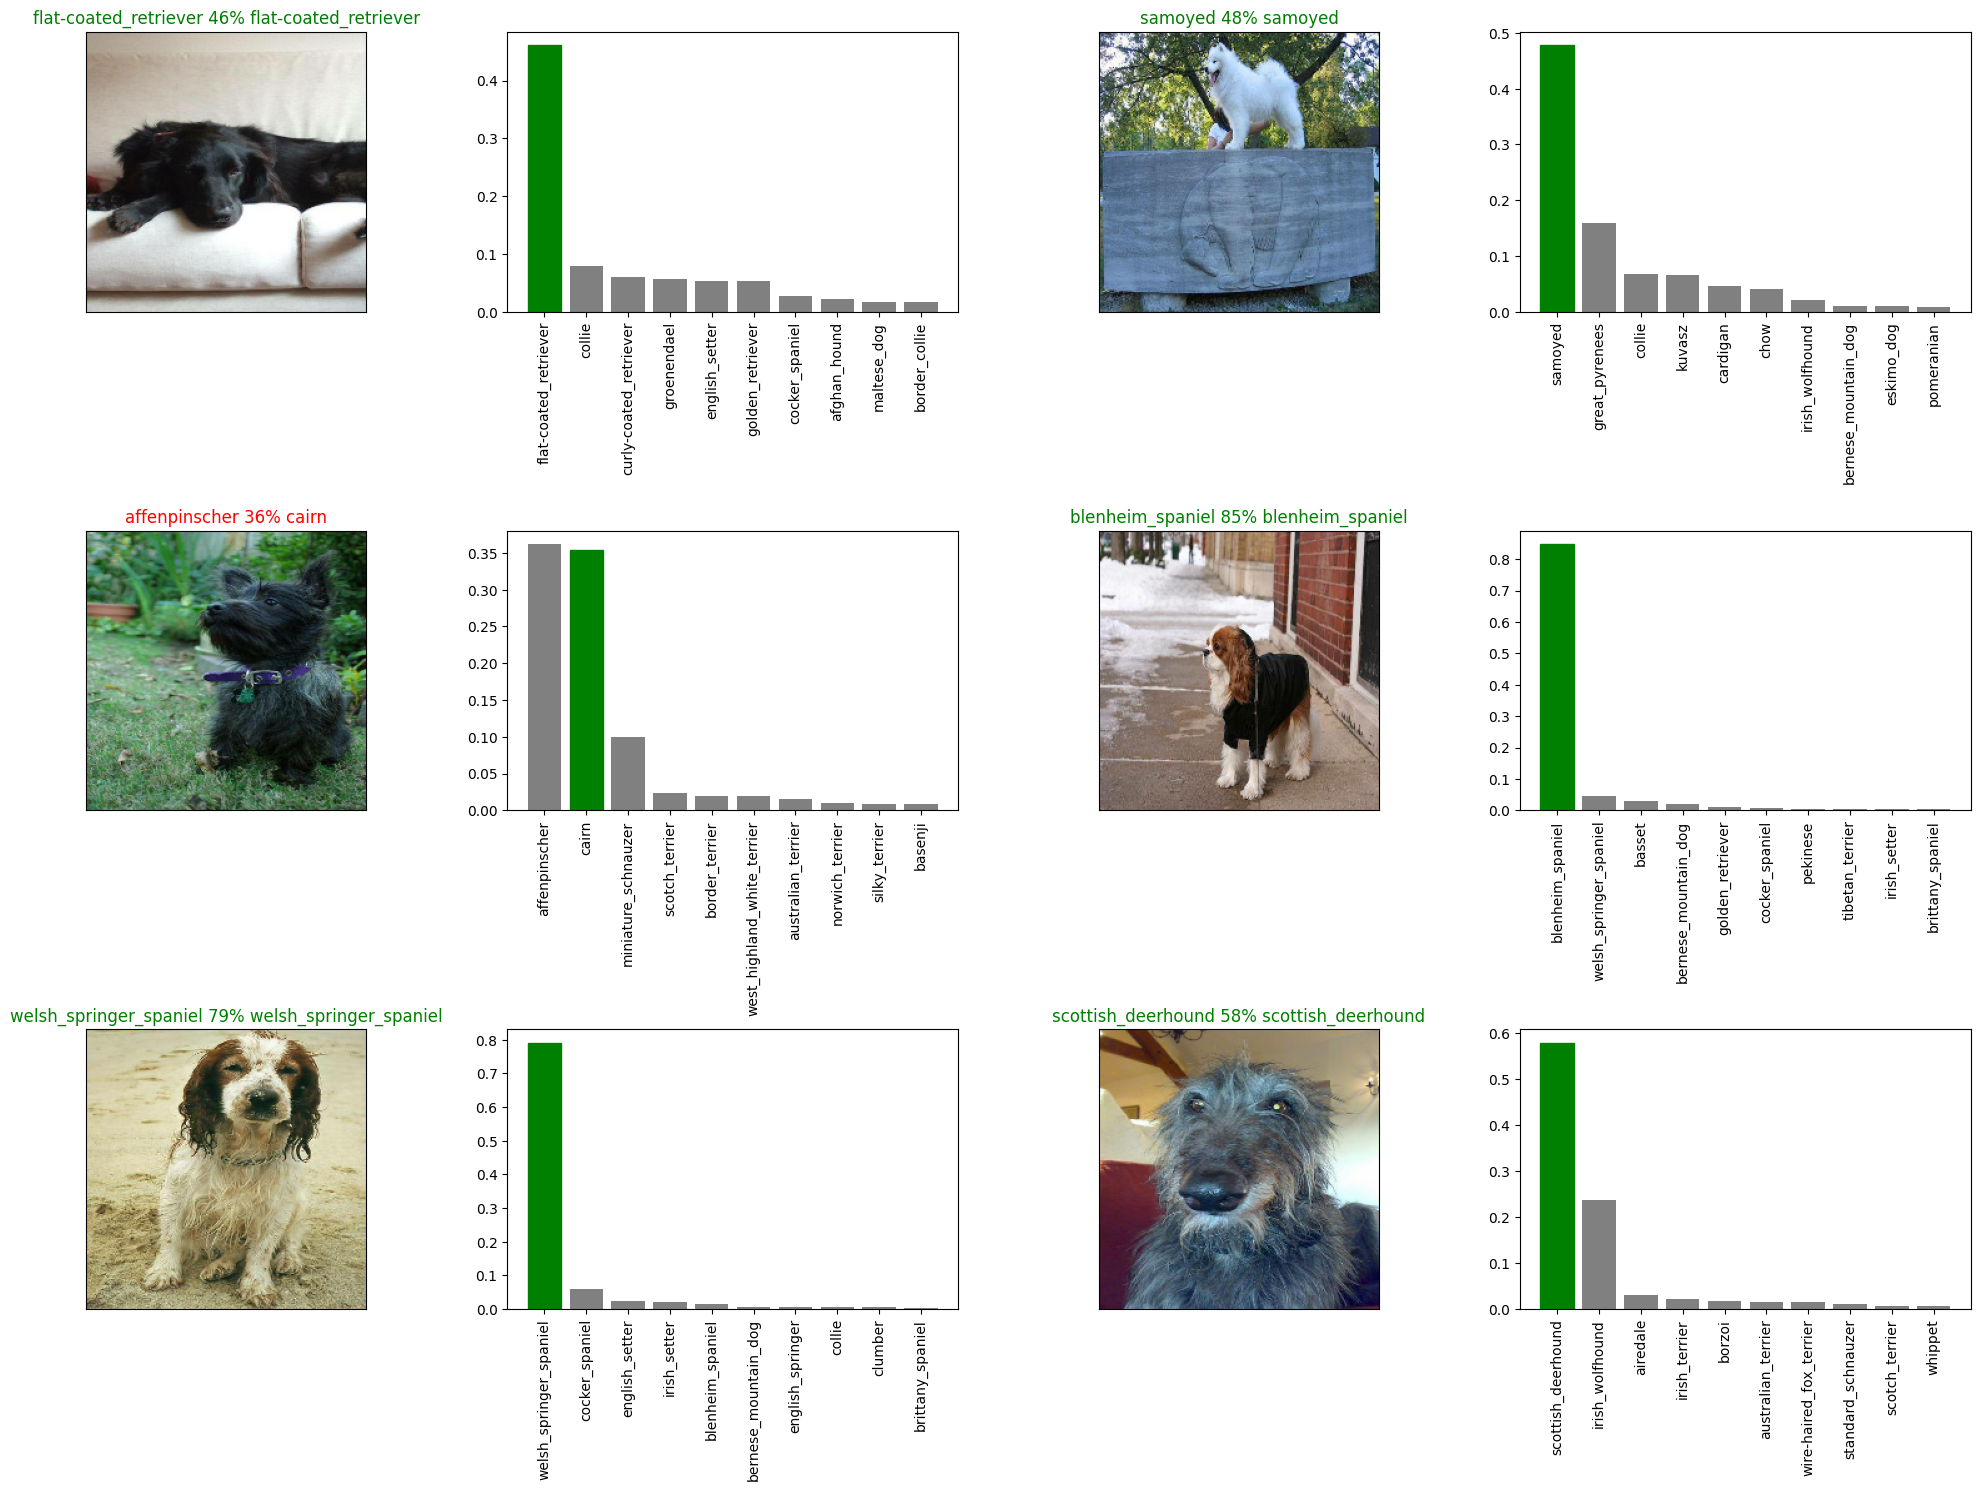

In [ ]:
##lets check out few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
##saving and reloading a model

In [ ]:
#create a function to save a model
def save_model(model, suffix=None):
  """save a given model in models directory and append a suffix """

  #create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f"Saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
#create a function to load a trained model
def load_model(model_path):
  """
  load a saved model from a specified path.
  """
  print(f"Loading saved model from :{model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to:/content/drive/MyDrive/Dog Vision/models/20230531-07031685516601-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Vision/models/20230531-07031685516601-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#LOAD trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Dog Vision/models/20230531-07031685516601-1000-images-mobilenetv2-Adam.h5')

Loading saved model from :/content/drive/MyDrive/Dog Vision/models/20230531-07031685516601-1000-images-mobilenetv2-Adam.h5


In [ ]:
#evaluate the presaved model
model.evaluate(val_data)

7/7 [==============================] - 1s 90ms/step - loss: 1.2448 - accuracy: 0.7000


[1.2448452711105347, 0.699999988079071]

In [ ]:
#evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 92ms/step - loss: 1.2448 - accuracy: 0.7000


[1.2448452711105347, 0.699999988079071]

## Training a big dog model on full data

In [ ]:
len(X),len(y)

(10222, 10222)

In [ ]:
X[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(X_train)

800

In [ ]:
##create a data batch with a full data set
full_data = create_data_batches(X, y)

Create training data batches..


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
#create full model callbaacks
full_model_tensorboard = create_tensorboard_callback()
#no validation set when training on all data ,so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
#Fit the full model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 43s 108ms/step - loss: 1.3525 - accuracy: 0.6701
Epoch 2/100
320/320 [==============================] - 34s 108ms/step - loss: 0.4061 - accuracy: 0.8809
Epoch 3/100
320/320 [==============================] - 34s 106ms/step - loss: 0.2412 - accuracy: 0.9308
Epoch 4/100
320/320 [==============================] - 34s 107ms/step - loss: 0.1536 - accuracy: 0.9627
Epoch 5/100
320/320 [==============================] - 34s 105ms/step - loss: 0.1056 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 34s 106ms/step - loss: 0.0784 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 34s 105ms/step - loss: 0.0585 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 35s 109ms/step - loss: 0.0460 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 35s 110ms/step - loss: 0.0380 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 33s 104m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to:/content/drive/MyDrive/Dog Vision/models/20230531-08541685523292-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Vision/models/20230531-08541685523292-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
#load in the full model
loaded_full_model = load_model('drive/MyDrive/Dog Vision/models/20230531-08171685521063-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from :drive/MyDrive/Dog Vision/models/20230531-08171685521063-full-image-set-mobilenetv2-Adam.h5


In [ ]:
#making predictions on the test dataset
#load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/effcbcfa58ba87eac8439b7106d8623c.jpg',
 'drive/MyDrive/Dog Vision/test/f57f8ce3fe1d928828e37a9bd78574d9.jpg',
 'drive/MyDrive/Dog Vision/test/f18e43d6627bf395c2e3aae518067004.jpg',
 'drive/MyDrive/Dog Vision/test/ea5ae600ca3996528b6548eceac767cf.jpg',
 'drive/MyDrive/Dog Vision/test/f0138bdbeba02c23bef5eebd81fcf3ec.jpg',
 'drive/MyDrive/Dog Vision/test/f02444318adc0c1c2360c3bf3bff5709.jpg',
 'drive/MyDrive/Dog Vision/test/f596d629c90c70820c38a094f03be387.jpg',
 'drive/MyDrive/Dog Vision/test/ecca3983aa3cf5699ce3aa29c7899df8.jpg',
 'drive/MyDrive/Dog Vision/test/ede0dddd46a46f8f6467b7fbd1b4958a.jpg',
 'drive/MyDrive/Dog Vision/test/f3aac2f76dfbfa4df96d63227c2c9390.jpg']

In [ ]:
#convert a filenames into test batches using create_data_batches ANd setting the test_data parameter to True
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
len(test_filenames)

10343

In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#make predictions on test data batch
test_predictions = loaded_full_model.predict(test_data,
                                              verbose=1)

324/324 [==============================] - 247s 740ms/step


In [ ]:
#save predictions to csv file
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv",test_predictions, delimiter=",")

In [ ]:
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[1.70597923e-05, 1.21295388e-05, 6.76685232e-08, ...,
        1.44419261e-07, 8.35975356e-07, 1.18418820e-05],
       [1.58004241e-07, 2.38767270e-11, 2.09997371e-13, ...,
        1.28540584e-13, 1.06375381e-10, 2.41724907e-09],
       [5.49409684e-11, 1.04194977e-11, 5.17008971e-07, ...,
        1.32935853e-07, 2.82928014e-10, 4.15692236e-09],
       ...,
       [2.18943204e-03, 6.84197187e-01, 1.39541321e-08, ...,
        2.04969706e-06, 4.56516241e-10, 4.63156020e-08],
       [4.44318111e-08, 3.04122305e-09, 4.18577928e-09, ...,
        6.36630748e-09, 1.25335910e-05, 2.63150250e-05],
       [4.26355951e-10, 1.21496435e-09, 3.10166931e-12, ...,
        2.18413981e-10, 1.24392101e-13, 9.98772442e-01]])

In [ ]:
test_predictions.shape

(10343, 120)

In [ ]:
#["id"]+list(unique_breeds)

In [ ]:
#PREPARING test dataset predictions for kaggle
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
#append test image id to predictions dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [ ]:
os.path.splitext(test_filenames[0])
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,effcbcfa58ba87eac8439b7106d8623c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f57f8ce3fe1d928828e37a9bd78574d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f18e43d6627bf395c2e3aae518067004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ea5ae600ca3996528b6548eceac767cf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f0138bdbeba02c23bef5eebd81fcf3ec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#add the predictions probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,effcbcfa58ba87eac8439b7106d8623c,1.705979e-05,1.212954e-05,6.766852e-08,3.270585e-06,7.376904e-08,5.646077e-06,3.468420e-08,9.593571e-08,3.412969e-05,...,7.857973e-07,6.650744e-08,2.072213e-07,2.078997e-07,1.080628e-08,1.324653e-06,7.122924e-09,1.444193e-07,8.359754e-07,1.184188e-05
1,f57f8ce3fe1d928828e37a9bd78574d9,1.580042e-07,2.387673e-11,2.099974e-13,1.885983e-10,1.522688e-10,2.062739e-12,3.434639e-10,8.704064e-10,4.546996e-11,...,5.247346e-07,2.483437e-10,1.625429e-09,8.734197e-10,1.133918e-10,1.261798e-11,6.278264e-10,1.285406e-13,1.063754e-10,2.417249e-09
2,f18e43d6627bf395c2e3aae518067004,5.494097e-11,1.041950e-11,5.170090e-07,1.227155e-11,2.316634e-09,1.149351e-08,3.844531e-06,3.404007e-10,1.508859e-12,...,1.134661e-09,1.162360e-06,7.669149e-09,2.529045e-13,1.827423e-08,9.156426e-12,2.117504e-12,1.329359e-07,2.829280e-10,4.156922e-09
3,ea5ae600ca3996528b6548eceac767cf,9.993319e-01,3.021614e-10,8.274472e-12,1.000040e-09,1.017512e-11,5.155119e-13,3.817403e-11,1.300740e-11,2.161681e-12,...,1.472979e-07,7.873319e-11,2.671514e-09,2.812500e-08,3.577220e-13,1.255718e-13,1.949098e-12,2.290944e-10,1.100179e-08,5.317817e-09
4,f0138bdbeba02c23bef5eebd81fcf3ec,1.043663e-08,3.027721e-10,3.427381e-12,1.711936e-11,8.242385e-11,3.571093e-11,7.050304e-10,3.836774e-11,5.523789e-13,...,4.589129e-10,2.653179e-10,1.391391e-11,1.190173e-13,1.146308e-10,3.331489e-11,4.348110e-13,2.775730e-13,6.237557e-10,1.142032e-08


In [ ]:
#save our predictions dataframe to csv for dubmissions to kaggle
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv",
                index=False)

In [ ]:
##making predictions on custom images
custom_path = "/content/drive/MyDrive/Dog Vision/dog-pics"
custom_image_paths=[custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['/content/drive/MyDrive/Dog Vision/dog-picsimages.jpeg',
 '/content/drive/MyDrive/Dog Vision/dog-picsimages (1).jpeg',
 '/content/drive/MyDrive/Dog Vision/dog-pics.ipynb_checkpoints']

In [ ]:
#turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#make predictions on the custom data
custom_preds=loaded_full_model.predict(custom_data)

NotFoundError: ignored

In [ ]:
custom_images=[]

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)


NotFoundError: ignored